# Manual is not ready yet
- 

In [64]:
%pylab inline 
import pandas as pd
import os 
import plotly.express as px
import matplotlib.pyplot as plt
import itertools 
from matplotlib import gridspec
import plotly.io as pio
pio.renderers.default = 'iframe' 

Populating the interactive namespace from numpy and matplotlib


In [92]:
df = pd.DataFrame()
df['P1'] = [100,120,150,105,80,110,200,130,100,190,100,100]
df['P2'] = [110,110,165,115,85,115,190,110,110,180,110,105]
df['Intersection'] =  [95,100,148,105,78,109,170,90,98,168,99,97]
df['JI'] = df['Intersection']/(df['P1']+df['P2']-df['Intersection'])
df['Names'] = ['Pair'+str(i+1) for i in range(12)]

In [93]:
dv = df.copy()
df

,P1,P2,Intersection,JI,Names
0,100,110,95,0.826087,Pair1
1,120,110,100,0.769231,Pair2
2,150,165,148,0.886228,Pair3
3,105,115,105,0.913043,Pair4
4,80,85,78,0.896552,Pair5
5,110,115,109,0.939655,Pair6
6,200,190,170,0.772727,Pair7
7,130,110,90,0.600000,Pair8
8,100,110,98,0.875000,Pair9
9,190,180,168,0.831683,Pair10


In [94]:
xaxis = []
skip = 0 
for i in list(range(dv.shape[0]*4)): 
    if skip  < 2: 
        xaxis.append(i)
        skip +=1
    elif skip == 2:
        skip +=1
    elif skip ==3: 
        skip =0
JIpos = arange(0.5, max(xaxis)+0.5, 4)       

In [95]:
def make_axis(num):
    xaxis = []
    skip = 0 
    for i in list(range(num*4)): 
        if skip  < 2: 
            xaxis.append(i)
            skip +=1
        elif skip == 2:
            skip +=1
        elif skip ==3: 
            skip =0
    JIpos = arange(0.5, max(xaxis)+0.5, 4)   
    return xaxis, JIpos
    

In [96]:
def UpPair(df, vspacing = 0, title='UpPair',title_fontsize =18, plot_type='scatter', point_color = 'black',
          marker = "^", upper_ylabel = "Jaccard Index", upper_color = 'red', upper_legend = False, connected = 'None',
          upper_ymin = 0.5, upper_ymax = 1, lower_color = 'green', color1 ='lightgreen', color2 = None, 
          lower_ylabel = None, lower_xlabel = 'Samples', tick_labels = None, intersection_width = 2.5,
          intersection_label = None, label1 = None, label2 = None, style = 'ggplot'):
    plt.style.use(style)
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(18)
    xaxis, JIpos = make_axis(df.shape[0])
    spec = gridspec.GridSpec(ncols=1, nrows=2,
                             width_ratios=[1], wspace=0.1,
                             hspace=vspacing, height_ratios=[1, 2])
    twin1 = fig.add_subplot(spec[0])
    plt.title(title, fontsize=title_fontsize)
    p2 = twin1.plot(JIpos, df['JI'], label=upper_ylabel, color = point_color, 
                        marker = marker, linestyle = connected, markersize=12)
    twin1.set_ylabel(upper_ylabel, fontsize=14)
    twin1.yaxis.label.set_color(upper_color)
    twin1.tick_params(axis='y', colors=upper_color, labelsize=14 )
    if upper_legend==True:
        twin1.legend()
    #SHADING

    twin1.set_ylim(upper_ymin, upper_ymax)  #Also change this
    alph =0.1
    grades = (upper_ymax-upper_ymin)/5
    for h in range(1,6):
        twin1.axhspan(upper_ymin+((h-1)*grades), upper_ymin+(h*grades), alpha=alph, lw=0, color=upper_color)
        alph +=0.14
    
    twin1.tick_params(axis ='x',bottom = False)
    twin1.set_xticklabels( [])

    if color2==None: 
        color2=color1
    ax = fig.add_subplot(spec[1])
    ax.bar(xaxis[::2], df['P1'], color = color1, 
           label = label1, edgecolor='black', alpha = 0.7, linewidth = 1)
    ax.bar(xaxis[1:][::2], df['P2'], color = color2, 
           label = label2, edgecolor='black', alpha = 0.7, linewidth = 1)
    ax.bar(JIpos, df['Intersection'], width = intersection_width, alpha =0.7, color =lower_color, 
           edgecolor='black', label = intersection_label)
    ax.legend()
    ax.set_xticks(JIpos)
    ax.tick_params(axis='y', colors=lower_color , labelsize=14 )
    ax.yaxis.label.set_color(lower_color)
    ax.set_ylabel(lower_ylabel, fontsize=18)
    ax.set_xlabel(lower_xlabel, fontsize=18)
    ax.set_xticklabels( tick_labels, rotation =45)


    plt.show()


# Example 1 
- Visualize the overlap of replicate samples from the same patient sequenced separaltey 

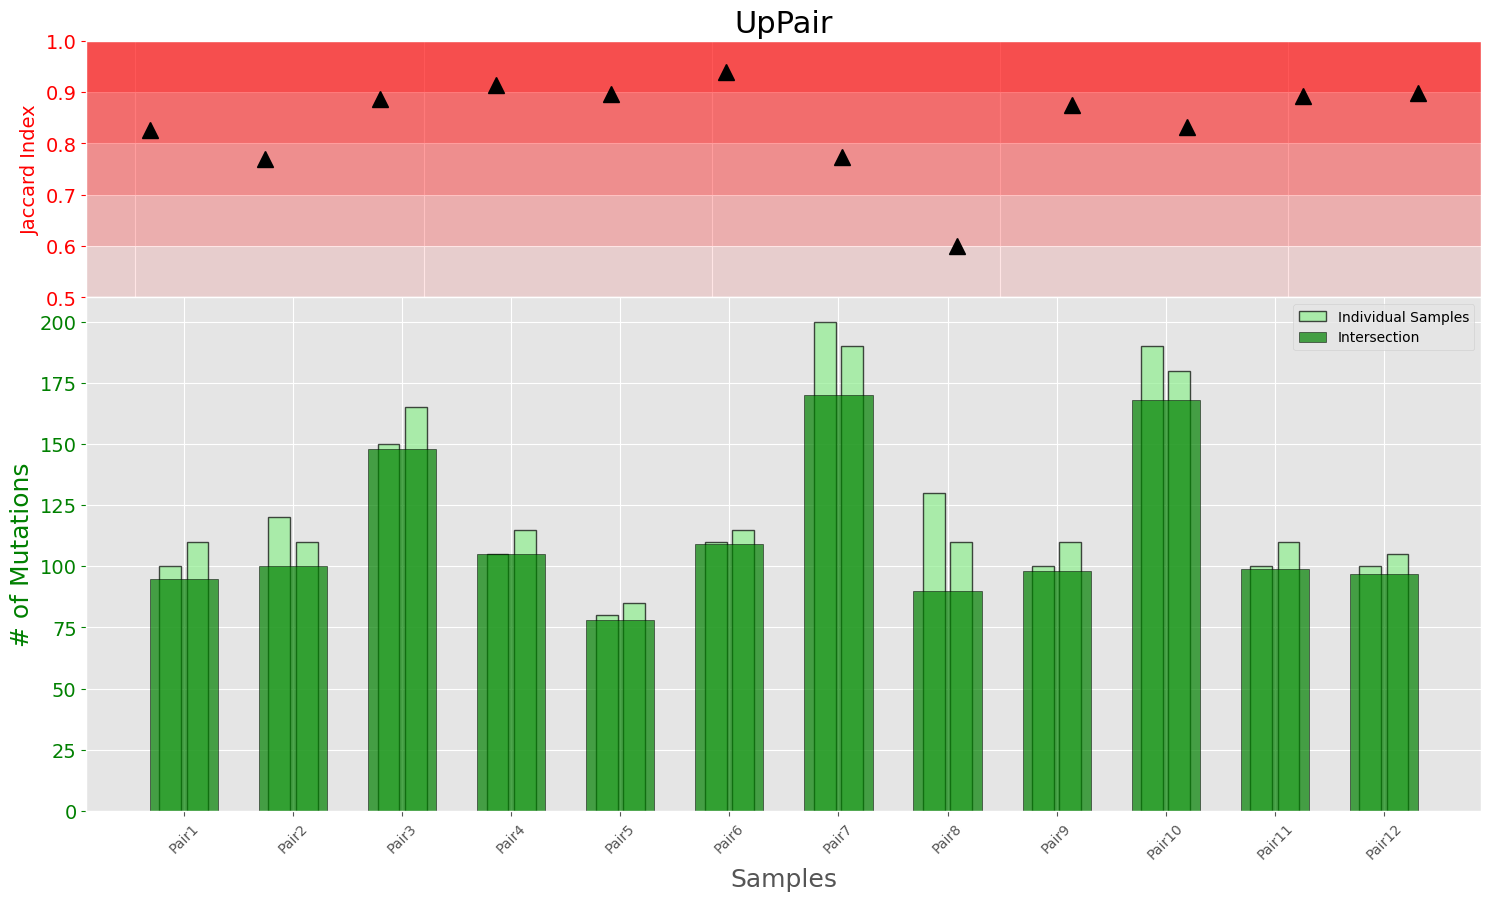

In [97]:
UpPair(df, vspacing = 0, title='UpPair',title_fontsize =22, plot_type='scatter', point_color = 'black',
          marker = "^", upper_ylabel = "Jaccard Index", upper_color = 'red', upper_legend = False, connected = 'None',
          upper_ymin = 0.5, upper_ymax = 1, lower_color = 'green', color1 ='lightgreen', color2 = None, 
          lower_ylabel = '# of Mutations', lower_xlabel = 'Samples', tick_labels = df['Names'], 
          intersection_label = 'Intersection', label1 = 'Individual Samples', label2 = None)

# Example 2
- Visualize the results overlap of different variant callers on the same sample

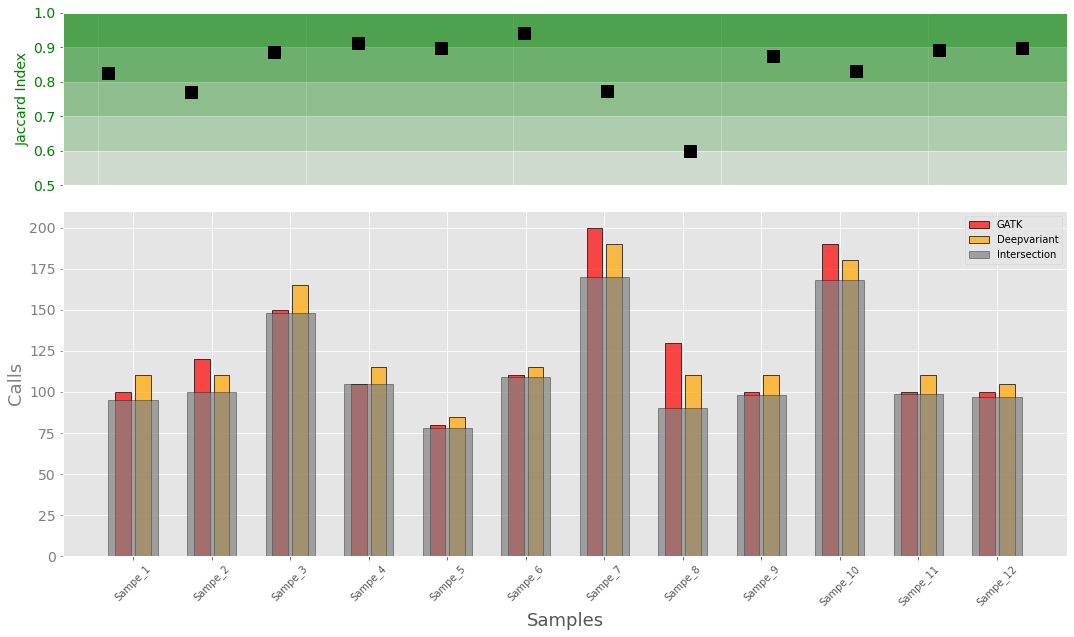

In [72]:
UpPair(df, vspacing = 0.1, title=None,title_fontsize =18, plot_type='scatter', point_color = 'black',
          marker = "s", upper_ylabel = "Jaccard Index", upper_color = 'green', upper_legend = False, connected = 'None',
          upper_ymin = 0.5, upper_ymax = 1, lower_color = 'gray', color1 ='red', color2 = 'orange', 
          lower_ylabel = 'Calls', lower_xlabel = 'Samples', tick_labels = ['Sampe_'+str(i) for i in range(1,13)], 
          intersection_label = 'Intersection', label1 = 'GATK', label2 = 'Deepvariant')

In [76]:
df = pd.DataFrame()
df['SNP1'] = array([19,15,15,15,12,10,24,12,15,19,25,13])
df['SNP2'] = array([16,18,16,20,19,15,30,17,12,13,18,17])
df['IND1'] = [15,20,16,15,8,11,11,17,11,16,18,19]
df['IND2'] = [15,17,19,15,10,22,10,10,19,11,12,15]
df['SNP_Intersection'] =  [15,14,13,15,12,11,20,13,12,12,15,12]
df['INDEL_Intersection'] =  [8,10,13,8,7,9,7,10,8,11,7,10]
df['JI_SNP'] = df['SNP_Intersection']/(df['SNP1']+df['SNP2']-df['SNP_Intersection'])
df['JI_INDEL'] = df['INDEL_Intersection']/(df['IND1']+df['IND2']-df['INDEL_Intersection'])
df['Names'] = ['Individual'+str(i+1) for i in range(12)]

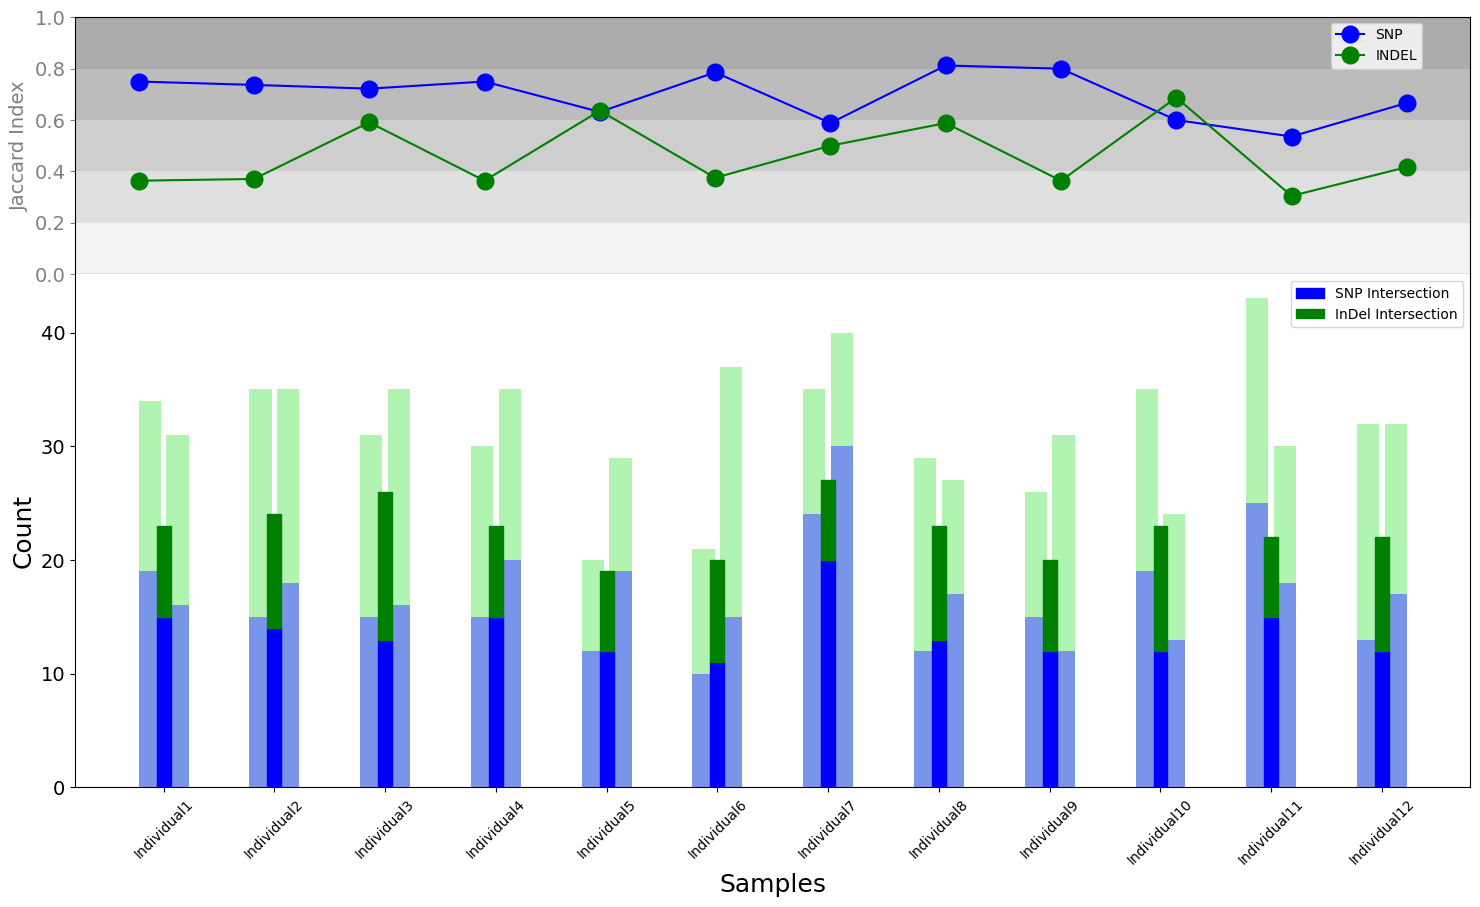

In [79]:
#custom_rcParams = {'font.family': 'Times New Roman'}
#plt.style.use('_classic_test_patch')
Stacked_UpPair(df['SNP1'], df['SNP2'], df['IND1'], df['IND2'], df['SNP_Intersection'], df['INDEL_Intersection'],
               df['JI_SNP'], df['JI_INDEL'], shading = True, vspacing = 0, title=None,title_fontsize =18, plot_type='scatter', point_color = 'black',
          marker = "o", upper_label1 = 'SNP', upper_label2 = 'INDEL',upper_ylabel='Jaccard Index',  upper_color = 'gray', upper_legend = True, 
               connected = '-', upper_ymin = 0.0, upper_ymax = 1, lower_color = 'black', color1 ='royalblue', color2 = 'lightgreen', 
               int1_color = 'blue', int2_color ='green',intersection_width=.5,int1_label = 'SNP Intersection', int2_label = 'InDel Intersection',
          lower_ylabel = 'Count', lower_xlabel = 'Samples', tick_labels = df['Names'], 
          label1 = None, label2 = None, style = 'default')

In [75]:
def Stacked_UpPair(left1, right1,left2, right2, int1, int2,var1, var2,  vspacing = 0,shading = True, title='UpPair',title_fontsize =18, plot_type='scatter', point_color = 'black',
          marker = "^", upper_label1 = None, upper_label2 = None, upper_ylabel=None, upper_color = 'red', upper_legend = False, connected = 'None',
          upper_ymin = 0.5, upper_ymax = 1, lower_color = 'green', color1 ='lightgreen', color2 = None, int1_color = None, int2_color = None,
          lower_ylabel = None, lower_xlabel = 'Samples', tick_labels = None, intersection_width = 2.5,
          int1_label = None,int2_label = None, label1 = None, label2 = None, style ='ggplot'):
    plt.style.use(style)
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(18)
    xaxis, JIpos = make_axis(len(left1))
    spec = gridspec.GridSpec(ncols=1, nrows=2,
                             width_ratios=[1], wspace=0.1,
                             hspace=vspacing, height_ratios=[1, 2])
    twin1 = fig.add_subplot(spec[0])
    plt.title(title, fontsize=title_fontsize)
    p1 = twin1.plot(JIpos, var1, label=upper_label1, color = int1_color, 
                        marker = marker, linestyle = connected, markersize=12)
    p2 = twin1.plot(JIpos, var2, label=upper_label2, color = int2_color, 
                        marker = marker, linestyle = connected, markersize=12)
    twin1.set_ylabel(upper_ylabel, fontsize=14)
    twin1.yaxis.label.set_color(upper_color)
    twin1.tick_params(axis='y', colors=upper_color, labelsize=14 )
    if upper_legend==True:
        twin1.legend(loc=(0.9,0.8))
    #SHADING
    if shading==True:
        twin1.set_ylim(upper_ymin, upper_ymax)  #Also change this
        alph =0.1
        grades = (upper_ymax-upper_ymin)/5
        for h in range(1,6):
            twin1.axhspan(upper_ymin+((h-1)*grades), upper_ymin+(h*grades), alpha=alph, lw=0, color=upper_color)
            alph +=0.14
    
    twin1.tick_params(axis ='x',bottom = False)
    twin1.set_xticklabels( [])
    
    twin1.spines['bottom'].set_visible(True)

    if color2==None: 
        color2=color1
    ax = fig.add_subplot(spec[1])
    ax.bar(xaxis[::2], left1, color = color1, 
           label = label1, edgecolor='None', alpha = 0.7, linewidth = 1)
    ax.bar(xaxis[1:][::2], right1, color = color1, 
           label = label2, edgecolor='None', alpha = 0.7, linewidth = 1)
    
    #stacked bar
    ax.bar(xaxis[::2], left2, color = color2, bottom = left1,
           label = label1, edgecolor='None', alpha = 0.7, linewidth = 1)
    ax.bar(xaxis[1:][::2], right2, color = color2, bottom = right1,
           label = label2, edgecolor='None', alpha = 0.7, linewidth = 1)
    #intersection
    ax.bar(JIpos, int1, width = intersection_width, alpha =1, edgecolor = int1_color, 
           color=int1_color, label = int1_label, linewidth=1)
    ax.bar(JIpos, int2,bottom = int1, width = intersection_width, alpha =1, edgecolor =int2_color, 
           color=int2_color, label = int2_label, linewidth = 1)
    
    
    ax.spines['top'].set_visible(False)
    
    ax.legend()
    ax.set_xticks(JIpos)
    ax.tick_params(axis='y', colors=lower_color , labelsize=14 )
    ax.yaxis.label.set_color(lower_color)
    ax.set_ylabel(lower_ylabel, fontsize=18)
    ax.set_xlabel(lower_xlabel, fontsize=18)
    ax.set_xticklabels( tick_labels, rotation =45)
    plt.show()


In [151]:
df = pd.DataFrame()
df['P1'] = [100,120,150,105,80,110,200,130,100,190,100,100]
df['P2'] = [110,110,165,115,85,115,190,110,110,180,110,105]
df['P3'] = array([110,110,165,115,85,124,190,110,110,180,110,105])-5
df['Intersection'] =  array([95,100,148,105,78,109,170,90,98,168,99,97])-7
df['JI'] = df['Intersection']/(df['P1']+df['P2']+df['P3']-df['Intersection']-df['Intersection'])
df['Names'] = ['Patient1'+str(i+1) for i in range(12)]

In [133]:
df

,P1,P2,P3,Intersection,JI,Names
0,100,110,96,95,0.818966,Pair1
1,120,110,96,100,0.793651,Pair2
2,150,165,151,148,0.870588,Pair3
3,105,115,101,105,0.945946,Pair4
4,80,85,71,78,0.975000,Pair5
5,110,115,110,109,0.931624,Pair6
6,200,190,176,170,0.752212,Pair7
7,130,110,96,90,0.576923,Pair8
8,100,110,96,98,0.890909,Pair9
9,190,180,166,168,0.840000,Pair10


In [134]:
def make_trio_axis(num):
    xaxis = []
    skip = 0 
    for i in list(range(num*5)): 
        if skip  < 3: 
            xaxis.append(i)
            skip +=1
        elif skip == 3:
            skip +=1
        elif skip ==4: 
            skip =0
    JIpos = arange(1, max(xaxis)+0.5, 5)   
    return xaxis, JIpos
    

In [135]:
make_trio_axis(12)[0][::3],make_trio_axis(12)[0][1:][::3], make_trio_axis(12)[0][2:][::3]

([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
 [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56],
 [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57])

In [219]:
def Trio_UpPair(df, vspacing = 0, title='UpPair',title_fontsize =18, plot_type='scatter', point_color = 'black',
          marker = "^", upper_ylabel = "Jaccard Index", upper_color = 'red', upper_legend = False, connected = 'None',
          upper_ymin = 0.5, upper_ymax = 1, lower_color = 'green', color1 ='lightgreen', color2 = None, color3 = None, 
          lower_ylabel = None, lower_xlabel = 'Samples', tick_labels = None, intersection_width = 2.5,
          intersection_label = None, label1 = None, label2 = None,label3 = None, style = 'ggplot',
                int_color = 'green', int_edgecolor='black'):
    plt.style.use(style)
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(18)
    xaxis, JIpos = make_trio_axis(df.shape[0])
    spec = gridspec.GridSpec(ncols=1, nrows=2,
                             width_ratios=[1], wspace=0.1,
                             hspace=vspacing, height_ratios=[1, 2])
    twin1 = fig.add_subplot(spec[0])
    plt.title(title, fontsize=title_fontsize)
    p2 = twin1.plot(JIpos, df['JI'], label=upper_ylabel, color = point_color, 
                        marker = marker, linestyle = connected, markersize=12)
    #right side 
    twin1.yaxis.tick_right()
    twin1.yaxis.set_label_position("right")
    
    
    twin1.set_ylabel(upper_ylabel, fontsize=14)
    twin1.yaxis.label.set_color('black')
    twin1.tick_params(axis='y', colors='black', labelsize=14 )
    if upper_legend==True:
        twin1.legend()
    #SHADING

    twin1.set_ylim(upper_ymin, upper_ymax)  #Also change this
    alph =0.1
    grades = (upper_ymax-upper_ymin)/5
    for h in range(1,6):
        twin1.axhspan(upper_ymin+((h-1)*grades), upper_ymin+(h*grades), alpha=alph, lw=0, color=upper_color)
        alph +=0.14
    
    twin1.tick_params(axis ='x',bottom = False)
    twin1.set_xticklabels( [])

    if color2==None: 
        color2=color1
    ax = fig.add_subplot(spec[1])
    ax.bar(xaxis[::3], df['P1'], color = color1, 
           label = label1, edgecolor='black', alpha = 0.7, linewidth = 1)
    ax.bar(xaxis[1:][::3], df['P2'], color = color2, 
           label = label2, edgecolor='black', alpha = 0.7, linewidth = 1)
    ax.bar(xaxis[2:][::3], df['P3'], color = color3, 
           label = label3, edgecolor='black', alpha = 0.7, linewidth = 1)
    ax.bar(JIpos, df['Intersection'], width = intersection_width, alpha =0.7, color =int_color, 
           edgecolor=int_edgecolor, label = intersection_label, linewidth = 3.5)
    
    for h, n, ind in zip(heights, names, range(36)):
        plt.text(xaxis[ind]-.3,5, n , rotation=90)
        
    
    ax.legend(fontsize = 17)
    ax.set_xticks(JIpos)
    ax.tick_params(axis='y', colors=lower_color , labelsize=14 )
    ax.yaxis.label.set_color(lower_color)
    ax.set_ylabel(lower_ylabel, fontsize=18)
    ax.set_xlabel(lower_xlabel, fontsize=18)
    ax.set_xticklabels( tick_labels, rotation =45)


    plt.show()


In [177]:
heights = []
for i in range(12):
    heights.append(df.loc[i]['P1'])
    heights.append(df.loc[i]['P2'])
    heights.append(df.loc[i]['P3'])

In [184]:
names = ['L_123_AB', 'LN_234_FB', 'P_456_R7', 'L_987_AT', 'LN_074_RY', 'P_56_IY', 'L_123_AB', 'LN_234_FB', 'P_456_R7', 'L_987_AT', 'LN_874_RY', 'P_56_IO',
         'L_163_AA', 'LN_264_FB', 'P_457_R7', 'L_917_AT', 'LN_174_RY', 'P_56_TT', 'L_123_YB', 'LN_234_FB', 'P_456_R7', 'L_987_AT', 'LN_874_RY', 'P_56_IO',
         'L_193_CB', 'LN_204_FB', 'P_156_R7', 'L_007_AT', 'LN_974_YY', 'P_56_BB', 'L_123_UB', 'LN_234_FB', 'P_456_R7', 'L_987_AT', 'LN_874_RY', 'P_56_IO',  
        ]

36

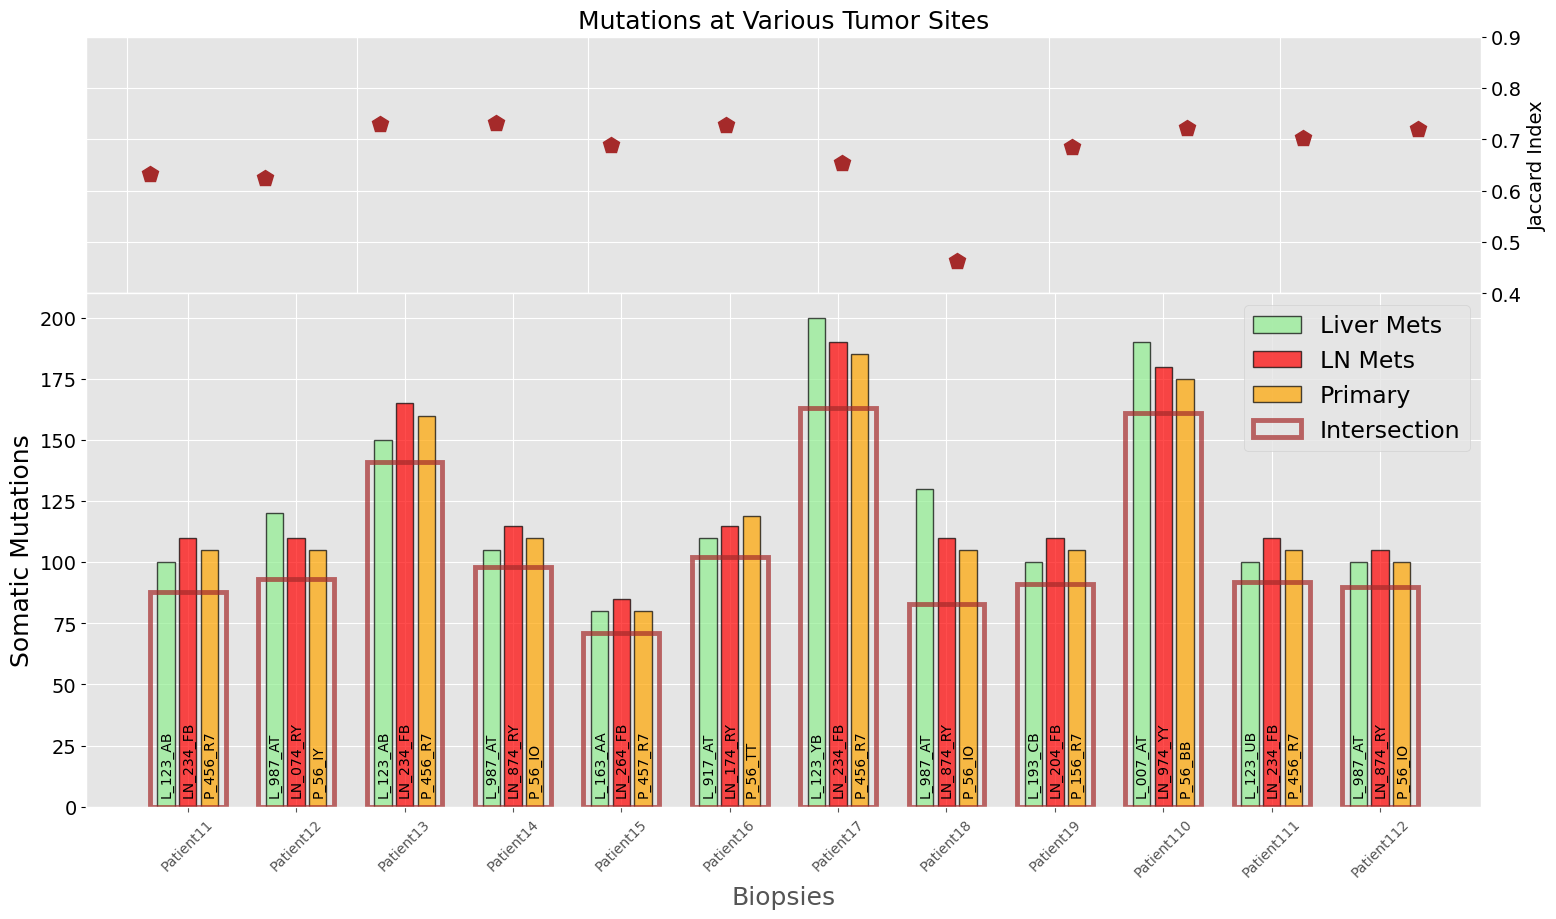

In [220]:
Trio_UpPair(df, vspacing = 0 , title='Mutations at Various Tumor Sites',title_fontsize =18, plot_type='scatter', point_color = 'brown',
          marker = "p", upper_ylabel = "Jaccard Index", upper_color = 'None', upper_legend = False, connected = 'None',
          upper_ymin = 0.4, upper_ymax = 0.9, lower_color = 'black', color1 ='lightgreen', color2 = 'red', color3='orange',
          lower_ylabel = 'Somatic Mutations', lower_xlabel = 'Biopsies', tick_labels = df['Names'], intersection_width = 3.5,
          intersection_label = 'Intersection', label1 = 'Liver Mets', label2 = 'LN Mets', label3 = 'Primary' ,style = 'ggplot', 
           int_color = 'None', int_edgecolor='brown')

In [276]:
df = pd.DataFrame()
df['P1'] = array([100,98,140,100,75,105,150,100,101,150,100,85])-10
df['P2'] = [110,110,165,115,85,115,190,110,110,180,110,105]
df['P3'] = [90,100,155,100,65,90,70,100,90,160,70,88]
df['Intersection1'] =  array([100,98,140,100,75,105,150,100,101,150,100,85]) -19
df['Intersection2'] =  array([90,100,155,100,65,90,70,100,90,160,70,88]) - 23
df['Sensitivity1'] = array([80,60,65,88,75,68,60,50,75,75,60,85])/100
df['Sensitivity2'] = (array([60,80,65,58,85,85,50,80,55,65,80,90])-5)/100
df['Names'] = ['Cancer_Type_'+str(i+1) for i in range(12)]

In [335]:
1-df['Sensitivity1']

0     0.20
1     0.40
2     0.35
3     0.12
4     0.25
5     0.32
6     0.40
7     0.50
8     0.25
9     0.25
10    0.40
11    0.15
Name: Sensitivity1, dtype: float64

In [336]:
def Tracking_UpPair(df, vspacing = 0, title='UpPair',title_fontsize =18, plot_type='scatter', point_color = 'black',
          marker = "^", upper_ylabel = 'Sensitivity', upper_ylabel1 = "Jaccard Index",upper_ylabel2 = "Jaccard Index", upper_color = 'red', upper_legend = False, connected = 'None',
          upper_ymin = 0.5, upper_ymax = 1, lower_color = 'green', color1 ='lightgreen', color2 = None, color3 = None, 
          lower_ylabel = None, lower_xlabel = 'Samples', tick_labels = None, intersection_width = 2.5,
          intersection_label = None, label1 = None, label2 = None,label3 = None, style = 'ggplot',
                int_color = 'green', int_edgecolor='black'):
    plt.style.use(style)
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(18)
    xaxis, JIpos = make_trio_axis(df.shape[0])
    spec = gridspec.GridSpec(ncols=1, nrows=3,
                             width_ratios=[1], wspace=0.1,
                             hspace=vspacing, height_ratios=[1, 1,3])
    twin1 = fig.add_subplot(spec[0])
    plt.title(title, fontsize=title_fontsize)
    p2 = twin1.plot(array(JIpos), df['Sensitivity1'], label=upper_ylabel, color = 'blue', 
                        marker = '^', linestyle = connected, markersize=12)
    p2 = twin1.plot(array(JIpos), df['Sensitivity2'], label=upper_ylabel, color = 'purple', 
                        marker = 'p', linestyle = 'dashed', markersize=12)
    #right side 
    #twin1.yaxis.tick_right()
    #twin1.yaxis.set_label_position("right")
    
    
    twin1.set_ylabel(upper_ylabel, fontsize=14)
    twin1.yaxis.label.set_color('black')
    twin1.tick_params(axis='y', colors='black', labelsize=14 )
    if upper_legend==True:
        twin1.legend()
    #SHADING

    twin1.set_ylim(upper_ymin, upper_ymax)  #Also change this
    alph =0.1
    grades = (upper_ymax-upper_ymin)/5
    for h in range(1,6):
        twin1.axhspan(upper_ymin+((h-1)*grades), upper_ymin+(h*grades), alpha=alph, lw=0, color=upper_color)
        alph +=0.14
    
    twin1.tick_params(axis ='x',bottom = False)
    twin1.set_xticklabels( [])
    
    
    
    #NEW
    
    twin2 = fig.add_subplot(spec[1])
    p2 = twin2.plot(array(JIpos), 1-df['Sensitivity1'], label=upper_ylabel, color = 'blue', 
                        marker = '^', linestyle = connected, markersize=12)
    p2 = twin2.plot(array(JIpos), 1-df['Sensitivity2'], label=upper_ylabel, color = 'purple', 
                        marker = 'p', linestyle = 'dashed', markersize=12)
    #right side 
    #twin1.yaxis.tick_right()
    #twin1.yaxis.set_label_position("right")
    
    
    twin2.set_ylabel('Specificity', fontsize=14)
    twin2.yaxis.label.set_color('black')
    twin2.tick_params(axis='y', colors='black', labelsize=14 )
    if upper_legend==True:
        twin2.legend()
        
    twin2.set_ylim(0, 1)  #Also change this
    alph =0.1
    grades = (1)/5
    for h in range(1,6):
        twin2.axhspan(0+((h-1)*grades), 0+(h*grades), alpha=alph, lw=0, color='red')
        alph +=0.14
    
    twin2.tick_params(axis ='x',bottom = False)
    twin2.set_xticklabels( [])
    #right side 
    twin2.yaxis.tick_right()
    twin2.yaxis.set_label_position("right")
    
    
    
    w = 1.4
    if color2==None: 
        color2=color1
    ax = fig.add_subplot(spec[2])
    ax.bar(array(xaxis[::3])-.5, df['P1'], color = 'deepskyblue', width = w, 
           label = label1, edgecolor='black', alpha = 0.7, linewidth = 0)
    ax.bar(xaxis[1:][::3], df['P2'], color = color2, width = w, 
           label = label2, edgecolor='black', alpha = 0.7, linewidth = 0)
    ax.bar(array(xaxis[2:][::3])+.5, df['P3'], color = 'violet', width = w, 
           label = label3, edgecolor='black', alpha = 0.7, linewidth = 0)
    ax.bar(JIpos-.7, df['Intersection1'], width = intersection_width, alpha =0.7, color ='blue', 
           edgecolor=int_edgecolor, label = intersection_label, linewidth = 1.5)
    ax.bar(JIpos+.7, df['Intersection2'], width = intersection_width, alpha =0.7, color ='purple', 
           edgecolor=int_edgecolor, label = intersection_label, linewidth = 1.5)
    
    #for h, n, ind in zip(heights, names, range(36)):
    #    plt.text(xaxis[ind]-.3,5, n , rotation=90)
        
    
    ax.legend(fontsize = 17)
    ax.set_xticks(JIpos)
    ax.tick_params(axis='y', colors=lower_color , labelsize=14 )
    ax.yaxis.label.set_color(lower_color)
    ax.set_ylabel(lower_ylabel, fontsize=18)
    ax.set_xlabel(lower_xlabel, fontsize=18)
    ax.set_xticklabels( tick_labels, rotation =45)
    ax.set_xlim(-2, max(xaxis)+2)

    plt.show()


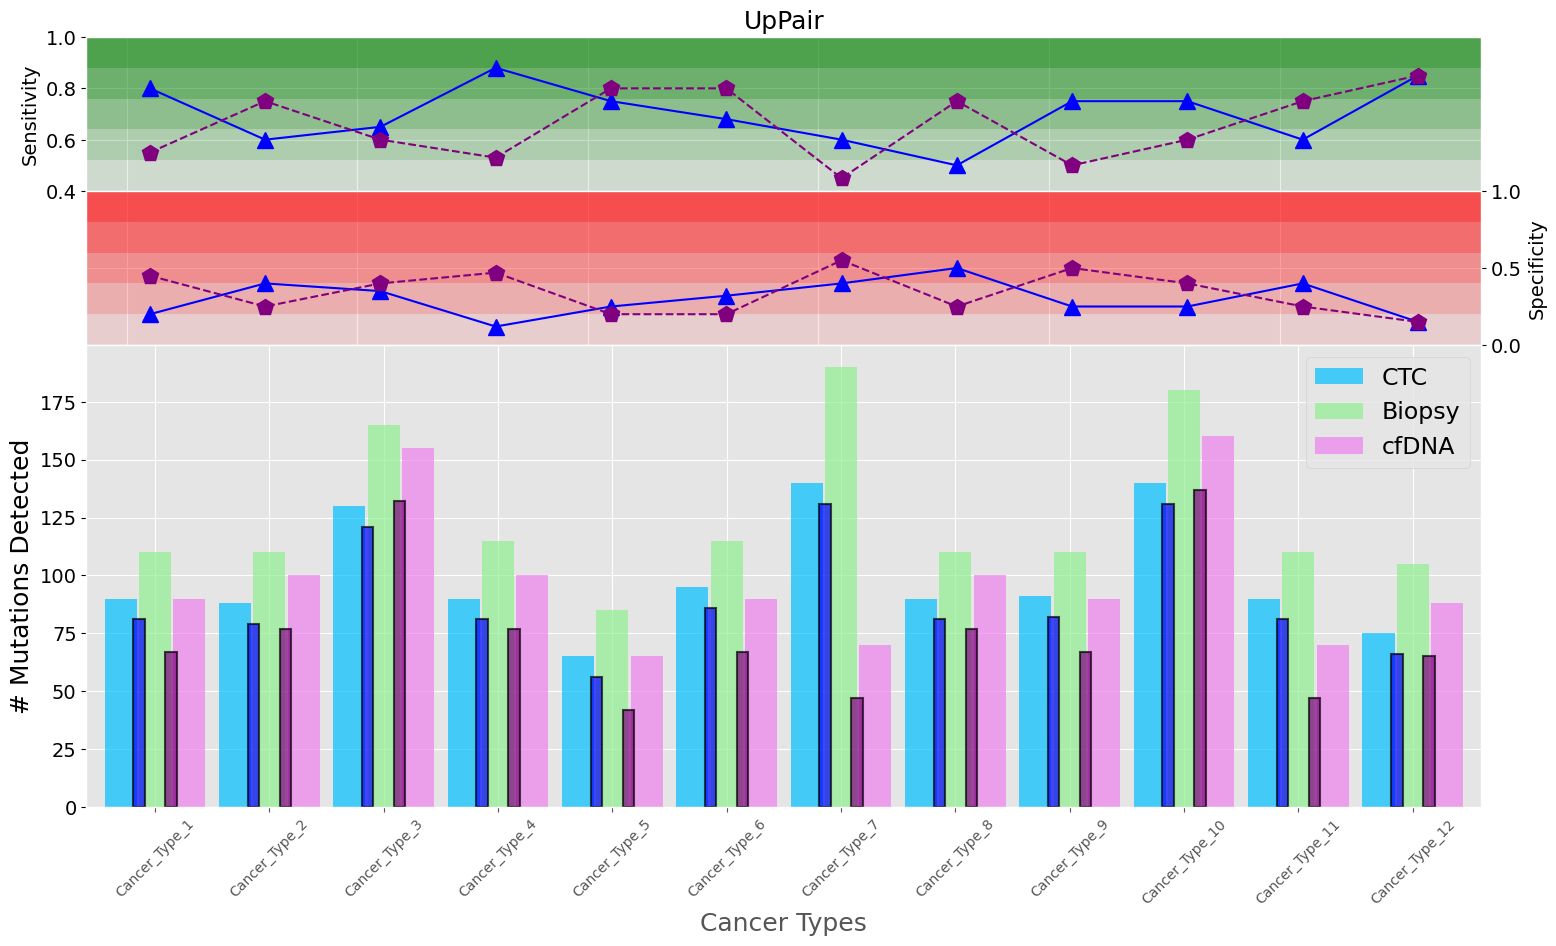

In [338]:
Tracking_UpPair(df, vspacing = 0, title='UpPair',title_fontsize =18, plot_type='scatter', point_color = 'black',
          marker = "^", upper_ylabel1 = "CTC",upper_ylabel2='cfDNA', upper_color = 'green', upper_legend = False, connected = '-',
          upper_ymin = 0.4, upper_ymax = 1, lower_color = 'black', color1 ='lightgreen', color2 = None, color3 = None, 
          lower_ylabel = '# Mutations Detected', lower_xlabel = 'Cancer Types', tick_labels = df['Names'], intersection_width = 0.5,
          intersection_label = None, label1 = 'CTC', label2 = 'Biopsy',label3 ='cfDNA', style = 'ggplot',
                int_color = 'green', int_edgecolor='black')

In [410]:
df = pd.DataFrame()
df['P1'] = array([10,16, 19, 30, 32, 35, 40, 50])
df['P2'] = array([8, 18, 16, 25, 27, 33, 37, 52])
df['Intersection'] =  array([8, 15, 15, 20, 22, 25, 20, 30]) 
df['JI'] = df['Intersection']/(df['P1']+df['P2']-df['Intersection'])
df['Timepoints'] = ['Sept. 2007', 'Aug 2008', 'Dec 2008', 'Jan. 2010', 'May 2011', 'Feb 2012', 'Nov 2012', 'June 2013']
df['PSA'] = [80, 3, 16, 50, 70, 80, 100, 140]
df['Biomarker'] = [30, 50, 40, 20, 40, 45, 55, 65]


In [397]:
df

,P1,P2,Intersection,JI,Timepoints,PSA,Biomarker
0,10,8,8,0.800000,Sept. 2007,40,30
1,16,18,15,0.789474,Aug 2008,3,50
2,19,16,15,0.750000,Dec 2008,16,40
3,30,25,20,0.571429,Jan. 2010,50,20
4,32,27,22,0.594595,May 2011,70,60
5,35,33,25,0.581395,Feb 2012,80,70
6,40,37,20,0.350877,Nov 2012,100,80
7,50,52,30,0.416667,June 2013,140,100


In [493]:
def continuous_UpPair(df, vspacing = 0, title='UpPair',title_fontsize =18, plot_type='scatter', point_color = 'black',
          marker = "^", upper_ylabel = "Jaccard Index", upper_color = 'red', upper_legend = False, connected = 'None',
          upper_ymin = 0.5, upper_ymax = 1, lower_color = 'green', color1 ='lightgreen', color2 = None, 
          lower_ylabel = None, lower_xlabel = 'Samples', tick_labels = None, intersection_width = 2.5,
          intersection_label = None, label1 = None, label2 = None, style = 'ggplot'):
    plt.style.use(style)
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(18)
    xaxis, JIpos = make_axis(df.shape[0])
    spec = gridspec.GridSpec(ncols=1, nrows=3,
                             width_ratios=[1], wspace=0.1,
                             hspace=vspacing, height_ratios=[1, 2,1])
    twin1 = fig.add_subplot(spec[0])
    plt.title(title, fontsize=title_fontsize)
    p2 = twin1.plot(JIpos, df['JI'], label=upper_ylabel, color = point_color, 
                        marker = marker, linestyle = connected, markersize=12)
    twin1.set_ylabel(upper_ylabel, fontsize=14)
    twin1.yaxis.label.set_color(upper_color)
    twin1.tick_params(axis='y', colors=upper_color, labelsize=14 )
    if upper_legend==True:
        twin1.legend()
    #SHADING

    twin1.set_ylim(upper_ymin, upper_ymax)  #Also change this
    alph =0.1
    grades = (upper_ymax-upper_ymin)/5
    for h in range(1,6):
        twin1.axhspan(upper_ymin+((h-1)*grades), upper_ymin+(h*grades), alpha=alph, lw=0, color=upper_color)
        alph +=0.14
    
    twin1.tick_params(axis ='x',bottom = False)
    twin1.set_xticklabels( [])

    if color2==None: 
        color2=color1
    ax = fig.add_subplot(spec[1])
    ax.bar(xaxis[::2], df['P1'], color = color1, 
           label = label1, edgecolor='black', alpha = 0.7, linewidth = 1)
    ax.bar(xaxis[1:][::2], df['P2'], color = color2, 
           label = label2, edgecolor='black', alpha = 0.7, linewidth = 1)
    ax.bar(JIpos, df['Intersection'], width = intersection_width, alpha =0.3, color =lower_color, 
           edgecolor='black', label = intersection_label)
    ax.legend(fontsize = 18, loc=(1,0.8), facecolor = 'None')
    
    ax.tick_params(axis='y', colors=lower_color , labelsize=14 )
    ax.yaxis.label.set_color(lower_color)
    ax.set_ylabel(lower_ylabel, fontsize=18)
    ax.set_xlim(-1.4, max(xaxis)+1.4)
    ax.set_xticklabels( [])

    
    ax1 = fig.add_subplot(spec[2])
    ax1.set_xticks(JIpos)
    ax1.set_xticks(JIpos)
    ax1.set_xlabel(lower_xlabel, fontsize=18)
    ax1.set_xticklabels( tick_labels, rotation =45)
    p1 = ax1.plot(JIpos, df['PSA'], label='Biomarker X', color = point_color, 
                        marker = '*', linestyle = 'dashed', markersize=12)
    p1 = ax1.plot(JIpos, df['Biomarker'], label='Biomarker Y', color = 'red', 
                        marker = 'd', linestyle = ':', markersize=12)
    ax1.bar(0,0, label = 'Treatment A', color = 'lightblue')
    ax1.bar(0,0, label = 'Treatment B', color = 'gray')
    ax1.bar(0,0, label = 'Treatment C', color = 'salmon')
    ax1.bar(0,0, label = 'Treatment D', color = 'palegreen')
    ax1.legend(fontsize = 18, loc=(1,0.5), facecolor = 'None')

    ax1.axvspan(JIpos[0], JIpos[2], alpha=0.5, lw=0, color='lightblue')
    ax1.axvspan(JIpos[2], JIpos[4], alpha=0.5, lw=0, color='gray') 
    ax1.axvspan(JIpos[4], JIpos[6], alpha=0.5, lw=0, color='salmon') 
    ax1.axvspan(JIpos[6], JIpos[7], alpha=0.5, lw=0, color='palegreen')
    ax1.set_ylabel('Biomarker\nLevels', fontsize=14)
    plt.show()


In [477]:
len(JIpos)

12

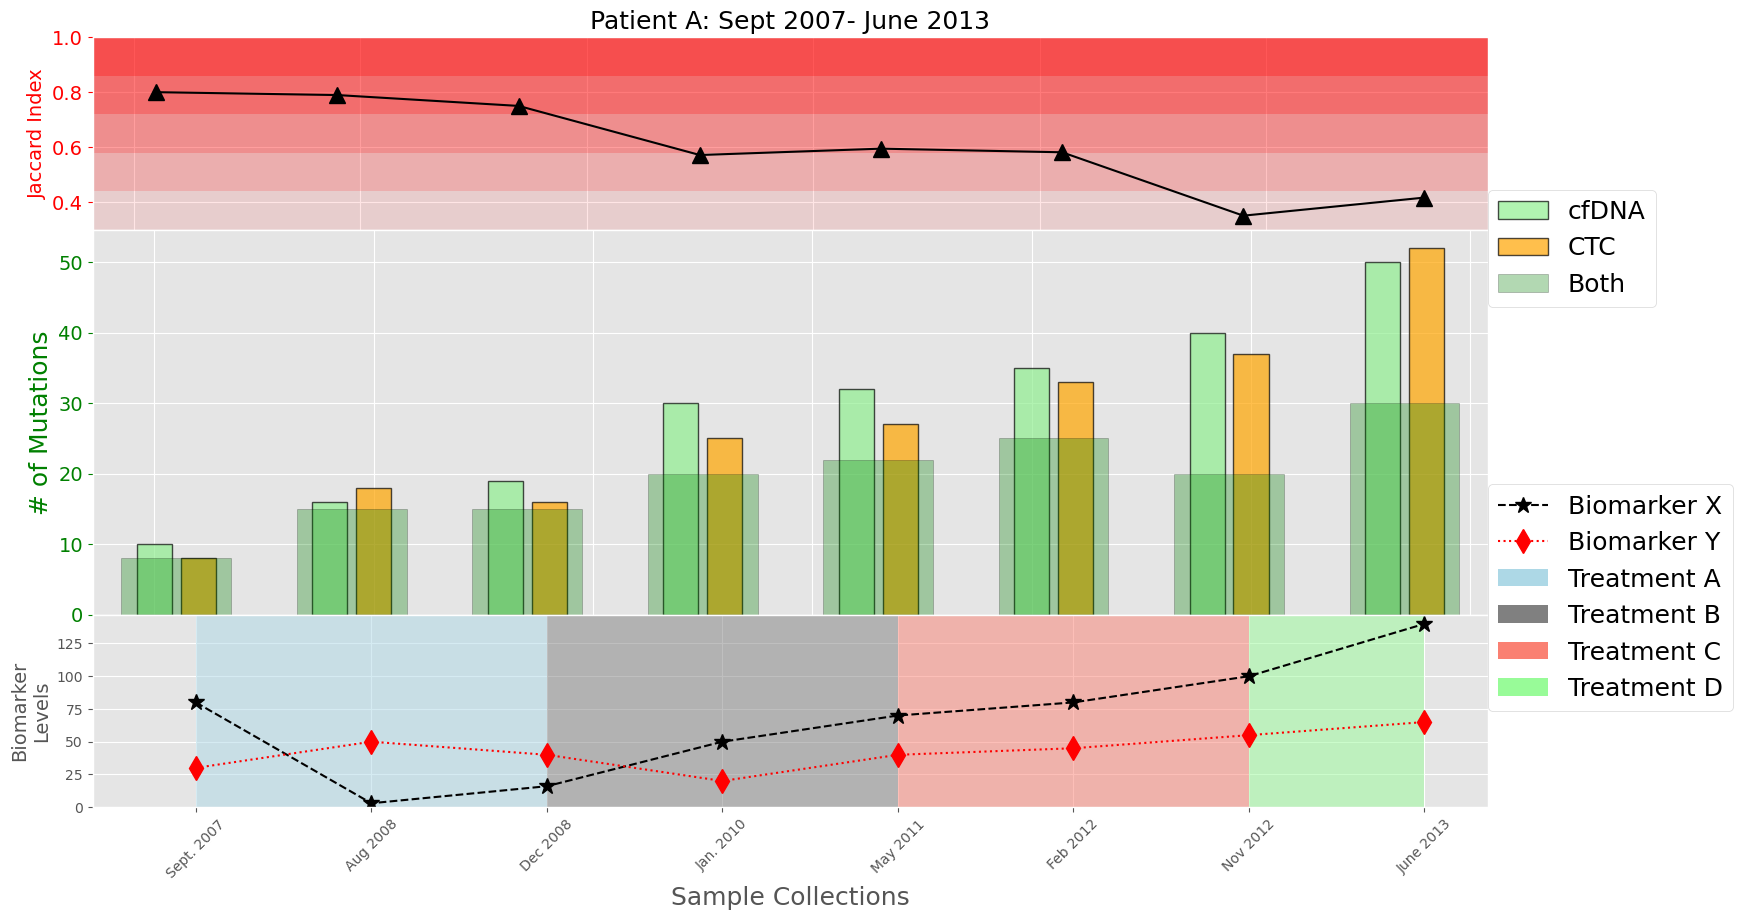

In [494]:
continuous_UpPair(df, vspacing = 0, title='Patient A: Sept 2007- June 2013',title_fontsize =18, plot_type='scatter', point_color = 'black',
          marker = "^", upper_ylabel = "Jaccard Index", upper_color = 'red', upper_legend = False, connected = '-',
          upper_ymin = 0.3, upper_ymax = 1, lower_color = 'green', color1 ='lightgreen', color2 = 'orange', 
          lower_ylabel = '# of Mutations', lower_xlabel = 'Sample Collections', tick_labels = df['Timepoints'], intersection_width = 2.5,
          intersection_label = 'Both', label1 = 'cfDNA', label2 = 'CTC', style = 'ggplot')

In [416]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

KeyError: 'JI'

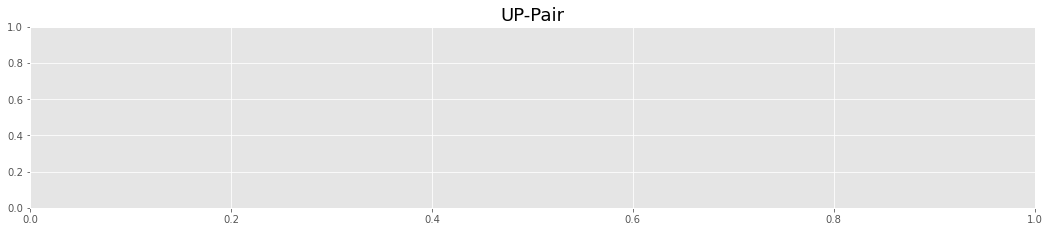

In [284]:

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(18)
spacing = 0
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         width_ratios=[1], wspace=0.1,
                         hspace=spacing, height_ratios=[1, 2])
twin1 = fig.add_subplot(spec[0])
plt.title('UP-Pair', fontsize =18)
#p2 = twin1.scatter(JIpos, df['JI'], label="Jaccard Index", color = 'black',edgecolor = 'white', marker = "^", s = 200)
p2 = twin1.plot(JIpos, df['JI'], label="Jaccard Index", color = 'black', marker = "^")
twin1.set_ylabel("Jaccard Index", fontsize=14)
twin1.yaxis.label.set_color('red')
twin1.tick_params(axis='y', colors='red', labelsize=14 )
ystart = 0.5
twin1.set_ylim(ystart, 1)  #Also change this
alph =0.15
for h in range(8):
    twin1.axhspan(ystart+(h*.10), ystart+.10+(h*.10), color='red', alpha=alph, lw=0)
    alph +=0.15
twin1.tick_params(axis ='x',bottom = False)
twin1.set_xticklabels( [])

dcolor = ['green']
plt.style.use('ggplot')
ax = fig.add_subplot(spec[1])

ax.bar(xaxis[::2], df['P1'], color = ['lightgreen'], 
       label = '# of calls', edgecolor='black', alpha = 0.7, linewidth = 1)

ax.bar(xaxis[1:][::2], df['P2'], color = ['lightgreen'], 
       label = None, edgecolor='black', alpha = 0.7, linewidth = 1)

ax.bar(JIpos, df['Intersection'], width = 2.5, alpha =0.7, color =dcolor, 
       edgecolor='black', label = 'Intersection Size')
ax.legend()
ax.set_xticks(JIpos)
ax.tick_params(axis='y', colors='green' , labelsize=14 )
ax.yaxis.label.set_color('green')
ax.set_ylabel("# of Variants", fontsize=18)
ax.set_xlabel("Groupings", fontsize=18)

ax.set_xticklabels( df['Names'], rotation =45)


plt.show()


In [ ]:
def Paired_Venn()
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(18)
spacing = 0
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         width_ratios=[1], wspace=0.1,
                         hspace=spacing, height_ratios=[1, 2])
twin1 = fig.add_subplot(spec[0])
plt.title('UP-Pair', fontsize =18)
p2 = twin1.scatter(JIpos, df['JI'], label="Jaccard Index", color = 'black',edgecolor = 'white', marker = "^", s = 200)
twin1.set_ylabel("Jaccard Index", fontsize=14)
twin1.yaxis.label.set_color('red')
twin1.tick_params(axis='y', colors='red', labelsize=14 )
ystart = 0.5
twin1.set_ylim(ystart, 1)  #Also change this
alph =0.15
for h in range(8):
    twin1.axhspan(ystart+(h*.10), ystart+.10+(h*.10), color='red', alpha=alph, lw=0)
    alph +=0.15
twin1.tick_params(axis ='x',bottom = False)
twin1.set_xticklabels( [])

dcolor = ['green']
plt.style.use('ggplot')
ax = fig.add_subplot(spec[1])

ax.bar(xaxis[::2], df['P1'], color = ['lightgreen'], 
       label = '# of calls', edgecolor='black', alpha = 0.7, linewidth = 1)

ax.bar(xaxis[1:][::2], df['P2'], color = ['lightgreen'], 
       edgecolor='black', alpha = 0.7, linewidth = 1)
ax.bar(JIpos, df['Intersection'], width = 2.5, alpha =0.7, color =dcolor, 
       edgecolor='black', label = 'Intersection Size')
ax.legend()
ax.set_xticks(JIpos)
ax.tick_params(axis='y', colors='green' , labelsize=14 )
ax.yaxis.label.set_color('green')
ax.set_ylabel("# of Variants", fontsize=18)
ax.set_xlabel("Groupings", fontsize=18)

ax.set_xticklabels( df['Names'], rotation =45)


plt.show()


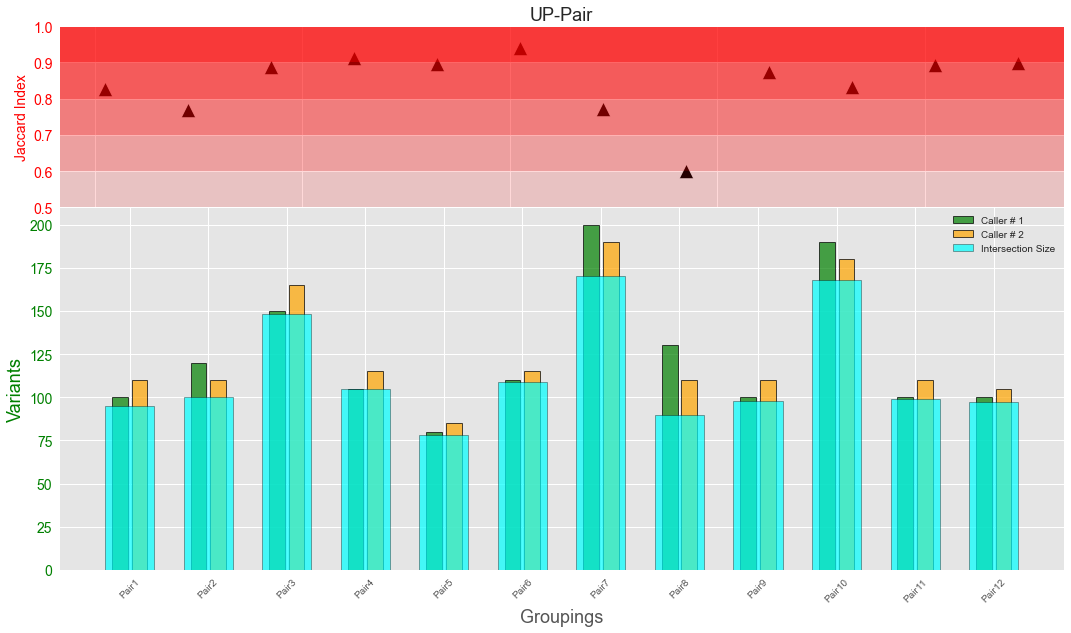

In [126]:

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(18)
spacing = 0
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         width_ratios=[1], wspace=0.1,
                         hspace=spacing, height_ratios=[1, 2])
twin1 = fig.add_subplot(spec[0])
plt.title('UP-Pair', fontsize =18)
p2 = twin1.scatter(JIpos, df['JI'], label="Jaccard Index", color = 'black',edgecolor = 'white', marker = "^", s = 200)
twin1.set_ylabel("Jaccard Index", fontsize=14)
twin1.yaxis.label.set_color('red')
twin1.tick_params(axis='y', colors='red', labelsize=14 )
ystart = 0.5
twin1.set_ylim(ystart, 1)  #Also change this
alph =0.15
for h in range(8):
    twin1.axhspan(ystart+(h*.10), ystart+.10+(h*.10), color='red', alpha=alph, lw=0)
    alph +=0.15
twin1.tick_params(axis ='x',bottom = False)
twin1.set_xticklabels( [])

dcolor = ['green']
plt.style.use('ggplot')
ax = fig.add_subplot(spec[1])

ax.bar(xaxis[::2], df['P1'], color = ['green'], 
       label = 'Caller # 1', edgecolor='black', alpha = 0.7, linewidth = 1)

ax.bar(xaxis[1:][::2], df['P2'], color = ['orange'], 
       label = 'Caller # 2',edgecolor='black', alpha = 0.7, linewidth = 1)
ax.bar(JIpos, df['Intersection'], width = 2.5, alpha =0.7, color ='cyan', 
       edgecolor='black', label = 'Intersection Size')
ax.legend()
ax.set_xticks(JIpos)
ax.tick_params(axis='y', colors='green' , labelsize=14 )
ax.yaxis.label.set_color('green')
ax.set_ylabel("Variants", fontsize=18)
ax.set_xlabel("Groupings", fontsize=18)

ax.set_xticklabels( df['Names'], rotation =45)


plt.show()
